In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
allattack=pd.read_csv("csv_all_attack_redhat_tcpdump.csv", parse_dates=['Time'])
allattack.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2011-11-04 10:04:11,0.0.0.0,255.255.255.255,BOOTP,590,Boot Request from 00:30:48:df:5a:1b (Supermic_...
1,2,2011-11-04 10:04:14,0.0.0.0,255.255.255.255,BOOTP,590,Boot Request from 00:30:48:df:5a:1b (Supermic_...
2,3,2011-11-04 10:04:17,0.0.0.0,255.255.255.255,BOOTP,590,Boot Request from 00:30:48:df:5a:1b (Supermic_...
3,4,2011-11-04 10:04:24,Micro-St_60:f7:fb,Broadcast,ARP,60,Who has 10.10.10.5? Tell 10.10.10.20
4,5,2011-11-04 10:04:24,Micro-St_60:f8:09,Micro-St_60:f7:fb,ARP,42,10.10.10.5 is at 00:11:09:60:f8:09


In [4]:
allattack.describe()

,No.,Length
count,3329833.000000,3329833.000000
mean,1664917.000000,163.334237
std,961240.133791,315.842112
min,1.000000,42.000000
25%,832459.000000,60.000000
50%,1664917.000000,66.000000
75%,2497375.000000,86.000000
max,3329833.000000,1514.000000


In [5]:
infodata = allattack[['Time','Source','Destination','Protocol',
                  'Length','Info']]

In [6]:
infodata.head()

,Time,Source,Destination,Protocol,Length,Info
0,2011-11-04 10:04:11,0.0.0.0,255.255.255.255,BOOTP,590,Boot Request from 00:30:48:df:5a:1b (Supermic_...
1,2011-11-04 10:04:14,0.0.0.0,255.255.255.255,BOOTP,590,Boot Request from 00:30:48:df:5a:1b (Supermic_...
2,2011-11-04 10:04:17,0.0.0.0,255.255.255.255,BOOTP,590,Boot Request from 00:30:48:df:5a:1b (Supermic_...
3,2011-11-04 10:04:24,Micro-St_60:f7:fb,Broadcast,ARP,60,Who has 10.10.10.5? Tell 10.10.10.20
4,2011-11-04 10:04:24,Micro-St_60:f8:09,Micro-St_60:f7:fb,ARP,42,10.10.10.5 is at 00:11:09:60:f8:09


In [7]:
category_group=infodata.groupby(['Source','Destination','Protocol']).sum()
category_group.head()

Length
Source      Destination     Protocol            
0.0.0.0     255.255.255.255 BOOTP        1303310
10.10.10.15 10.10.10.255    NBDS           12925
                            NBNS            4508
            10.10.10.5      ASF              120
                            BFD Control       78

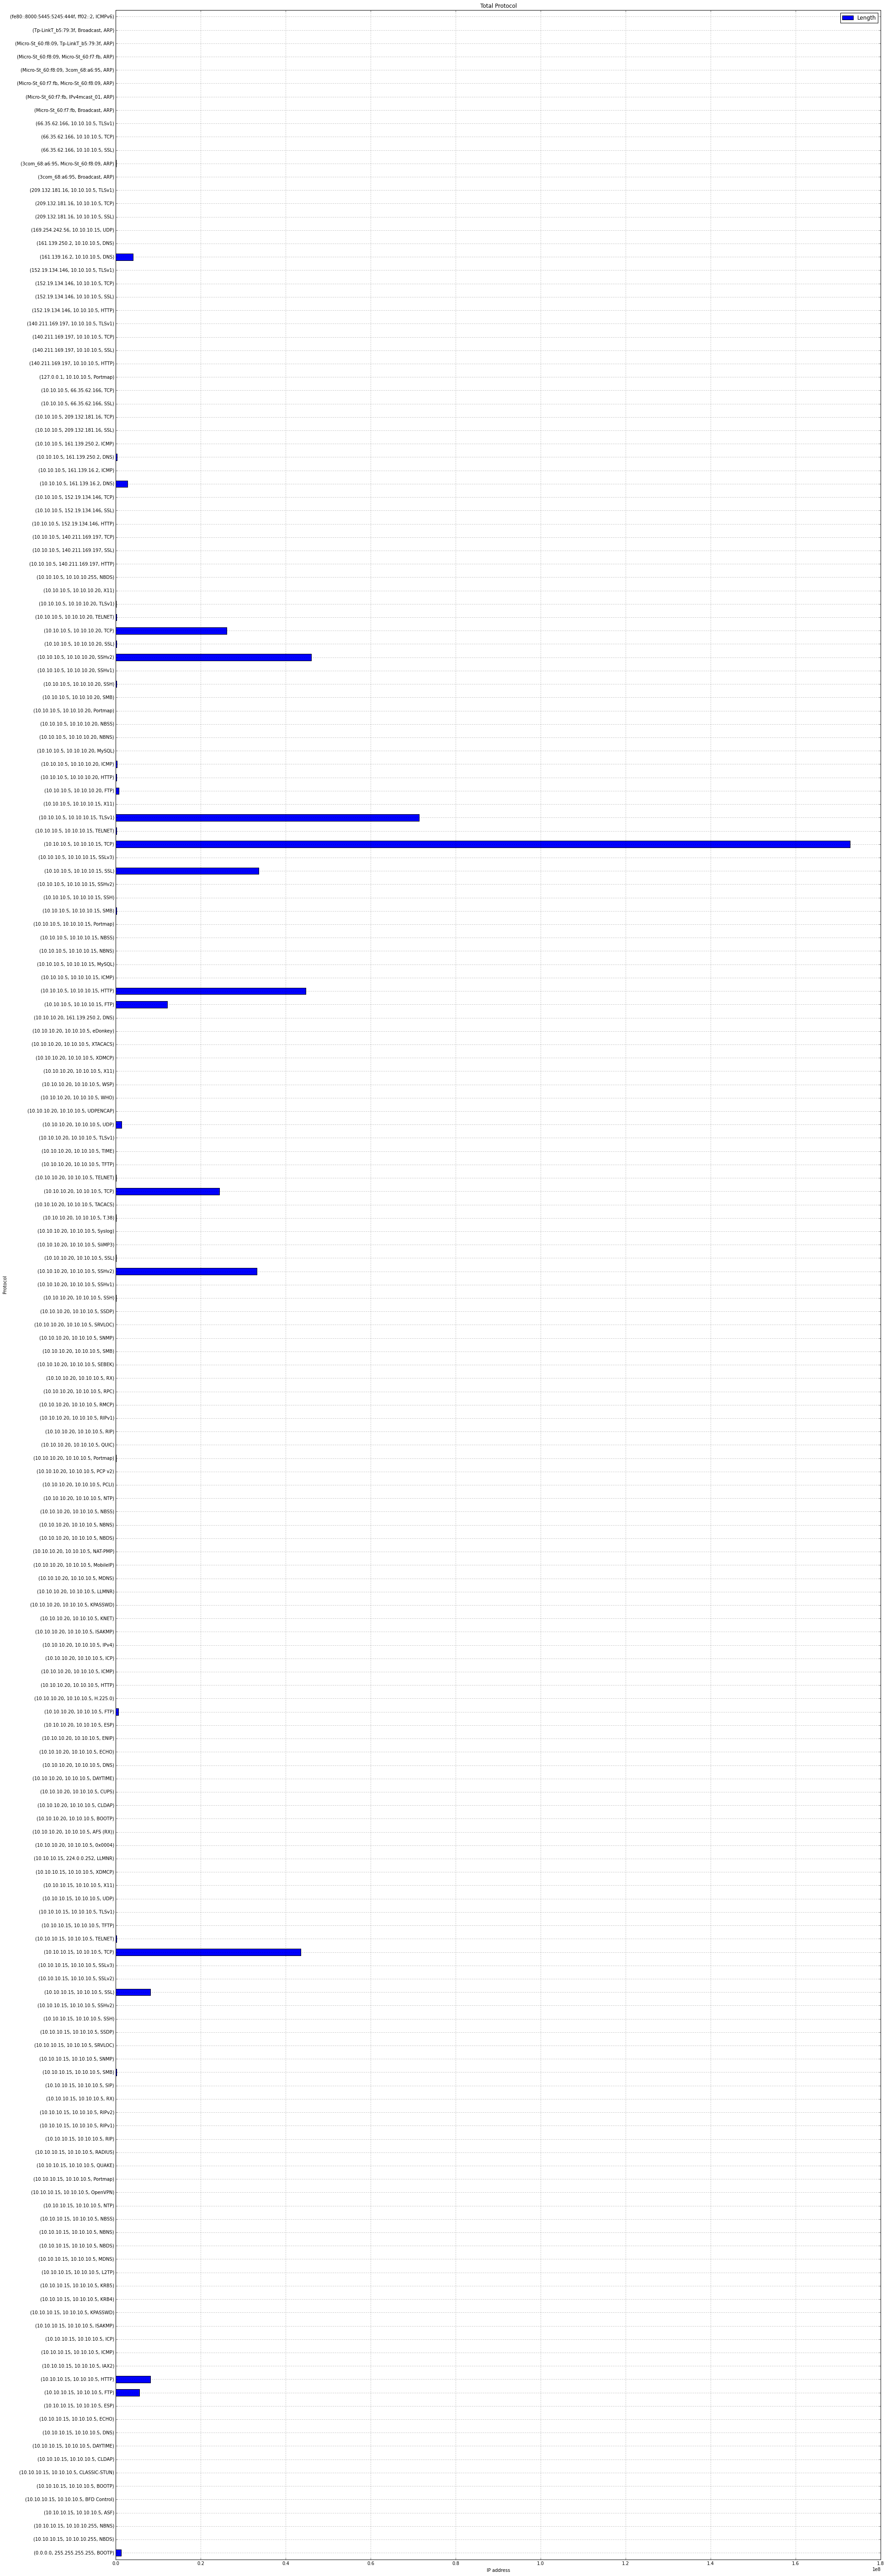

In [8]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Protocol",figsize=(30, 100),legend=True)
my_plot.set_xlabel("IP address")
my_plot.set_ylabel("Protocol")

In [9]:
fig = my_plot.get_figure()
fig.savefig("Total Protocol.png")

In [10]:
category_group.unstack()

Length                        \
Protocol                                     0x0004  AFS (RX)    ARP  ASF   
Source                    Destination                                       
0.0.0.0                   255.255.255.255       NaN       NaN    NaN  NaN   
10.10.10.15               10.10.10.255          NaN       NaN    NaN  NaN   
                          10.10.10.5            NaN       NaN    NaN  120   
                          224.0.0.252           NaN       NaN    NaN  NaN   
10.10.10.20               10.10.10.5             93       204    NaN  NaN   
                          161.139.250.2         NaN       NaN    NaN  NaN   
10.10.10.5                10.10.10.15           NaN       NaN    NaN  NaN   
                          10.10.10.20           NaN       NaN    NaN  NaN   
                          10.10.10.255          NaN       NaN    NaN  NaN   
                          140.211.169.197       NaN       NaN    NaN  NaN   
                          152.19.134.146        NaN       NaN    NaN  NaN   
                          161.139.16.2          NaN       NaN    NaN  NaN   
                          161.139.250.2         NaN       NaN    NaN  NaN   
                          209.132.181.16        NaN       NaN    NaN  NaN   
                          66.35.62.166          NaN       NaN    NaN  NaN   
127.0.0.1                 10.10.10.5            NaN       NaN    NaN  NaN   
140.211.169.197           10.10.10.5            NaN       NaN    NaN  NaN   
152.19.134.146            10.10.10.5            NaN       NaN    NaN  NaN   
161.139.16.2              10.10.10.5            NaN       NaN    NaN  NaN   
161.139.250.2             10.10.10.5            NaN       NaN    NaN  NaN   
169.254.242.56            10.10.10.15           NaN       NaN    NaN  NaN   
209.132.181.16            10.10.10.5            NaN       NaN    NaN  NaN   
3com_68:a6:95             Broadcast             NaN       NaN    480  NaN   
                          Micro-St_60:f8:09     NaN       NaN  47580  NaN   
66.35.62.166              10.10.10.5            NaN       NaN    NaN  NaN   
Micro-St_60:f7:fb         Broadcast             NaN       NaN    840  NaN   
                          IPv4mcast_01          NaN       NaN    120  NaN   
                          Micro-St_60:f8:09     NaN       NaN   7440  NaN   
Micro-St_60:f8:09         3com_68:a6:95         NaN       NaN  33600  NaN   
                          Micro-St_60:f7:fb     NaN       NaN   5880  NaN   
                          Tp-LinkT_b5:79:3f     NaN       NaN   1218  NaN   
Tp-LinkT_b5:79:3f         Broadcast             NaN       NaN  34380  NaN   
fe80::8000:5445:5245:444f ff02::2               NaN       NaN    NaN  NaN   

                                                                   \
Protocol                                     BFD Control    BOOTP   
Source                    Destination                               
0.0.0.0                   255.255.255.255            NaN  1303310   
10.10.10.15               10.10.10.255               NaN      NaN   
                          10.10.10.5                  78      597   
                          224.0.0.252                NaN      NaN   
10.10.10.20               10.10.10.5                 NaN     1810   
                          161.139.250.2              NaN      NaN   
10.10.10.5                10.10.10.15                NaN      NaN   
                          10.10.10.20                NaN      NaN   
                          10.10.10.255               NaN      NaN   
                          140.211.169.197            NaN      NaN   
                          152.19.134.146             NaN      NaN   
                          161.139.16.2               NaN      NaN   
                          161.139.250.2              NaN      NaN   
                          209.132.181.16             NaN      NaN   
                          66.35.62.166               NaN      NaN   
127.0.0.1                 10.1

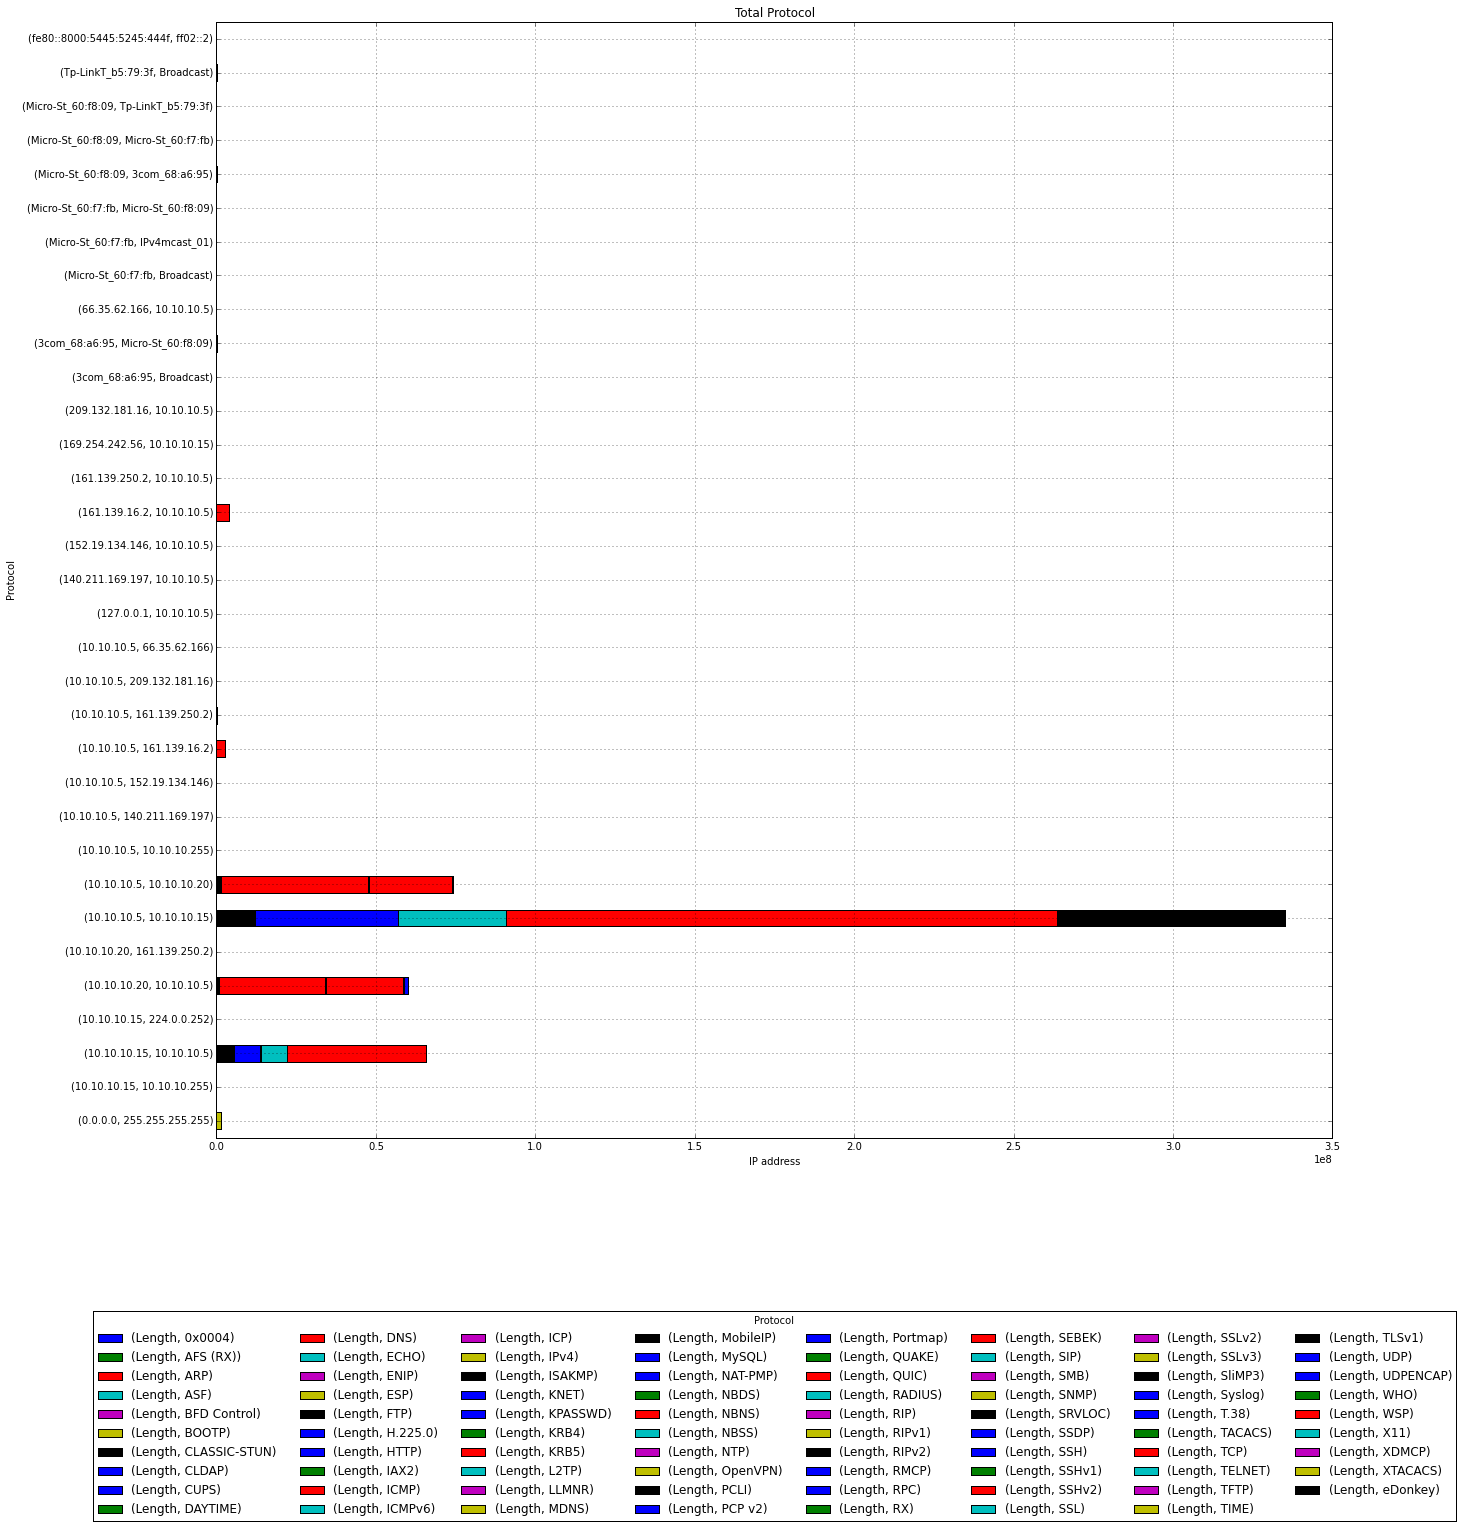

In [11]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol",figsize=(20, 20))
my_plot.set_xlabel("IP address")
my_plot.set_ylabel("Protocol")
patches, labels = my_plot.get_legend_handles_labels()
#my_plot.legend(patches, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Protocol")
my_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title="Protocol")

In [12]:
fig = my_plot.get_figure()
fig.savefig("Total Protocol sum.png")